In [1]:
import loica as lc
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# create the first strain
node_1 = lc.GeneticNetwork()

# add regulators
c4_reg = lc.Regulator(name='C4', degradation_rate=1, init_concentration=100)
scb2_reg = lc.Regulator(name='SCB2', degradation_rate=1)
laci_reg = lc.Regulator(name='LacI', degradation_rate=1)

node_1.add_regulator([c4_reg, scb2_reg, laci_reg])

# add reporters
mcherry_rep = lc.Reporter(name='mCherry', degradation_rate=1, color='red')
node_1.add_reporter(mcherry_rep)

# add operators
c4_laci = lc.Hill1(name='Prhl', input=c4_reg, output=laci_reg, alpha=[0.1, 10000], K=10, n=2)
laci_not_scb2 = lc.Hill1(name='Plac', input=laci_reg, output=[scb2_reg, mcherry_rep], alpha=[10000,0.1], K=10, n=2)

node_1.add_operator([c4_laci, laci_not_scb2])

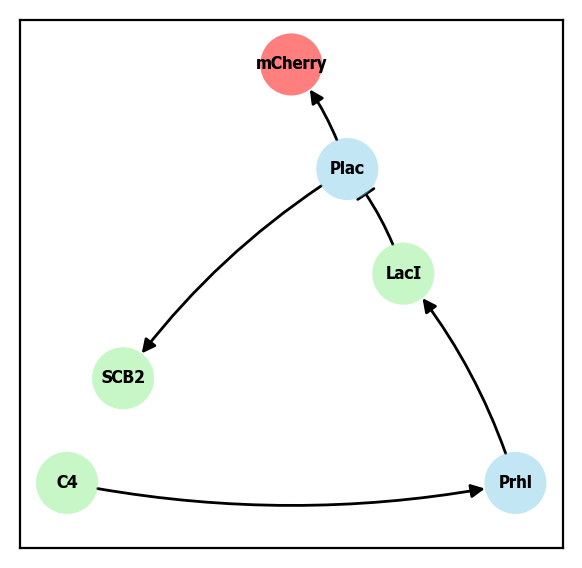

In [3]:
plt.figure(figsize=(3.5,3.5), dpi=200)
node_1.draw(pos=nx.planar_layout)

The cell below shows code for when new functionality will be added

In [ ]:
# create the first strain
node_1 = lc.GeneticNetwork()

# add regulators
c4_reg = lc.Regulator(name='C4', degradation_rate=1, diffusion_rate=1)
scb2_reg = lc.Regulator(name='SCB2', degradation_rate=1, diffusion_rate=1)
laci_reg = lc.Regulator(name='LacI', degradation_rate=1, diffusion_rate=1)

node_1.add_regulator([c4_reg, scb2_reg, laci_reg])

# add reporters
mcherry_rep = lc.Reporter(name='mCherry', degradation_rate=1, color='red')
node_1.add_reporter(mcherry_rep)

# add operators
c4_laci = lc.Hill1(name='Prhl', input=c4_reg, output=laci_reg, alpha=[0.1, 10000], K=10, n=2)
laci_not_scb2 = lc.Hill1(name='Plac', input=laci_reg, output=[scb2_reg, mcherry_rep], alpha=[10000,0.1], K=10, n=2)

node_1.add_operator([c4_laci, laci_not_scb2])

In [ ]:
# create consortium
repr_cons = lc.Consortium(strains=[node_1]) #, node_2, node_3
added_c4 = lc.Supplement(name="C4", concentration=5)
repr_cons.add_supplement(added_c4)
# Do I need to add supplement as regulator?
# I need to add code to do stochastic simulation so I could work further on this

In [4]:
def growth_rate(t):
    return 1 # gompertz_growth_rate(t, 0.01, 1, 1, 0.5)

def biomass(t):
    return 1 # gompertz(t, 0.01, 1, 1, 0.5)

metab = lc.SimulatedMetabolism("", biomass, growth_rate)

In [5]:
sample = lc.Sample(genetic_network=node_1, 
                    metabolism=metab)

assay = lc.Assay([sample], 
              n_measurements=100, 
              interval=0.1,
              name=f'mCherry expression from node 1',
              description='Simulated RFP expression fro node 1 generated by loica'
             )

Stochastic simulation

In [ ]:
assay.run(stochastic=True)

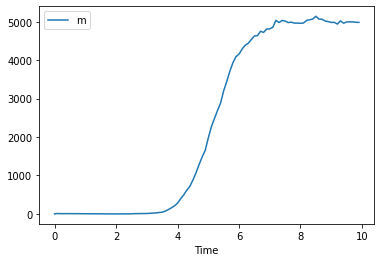

In [6]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='mCherry'].plot(x='Time', y='Measurement', style='-', ax=ax)
plt.legend('mCherry')

ODE simulation

In [6]:
assay.run(stochastic=False)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
c:\Users\User\.conda\envs\loica\lib\site-packages\loica\assay.py:103: FutureWarning: The frame.append method is deprecated and will be remove

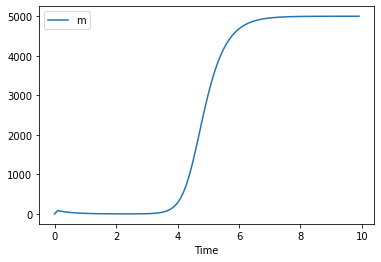

In [7]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='mCherry'].plot(x='Time', y='Measurement', style='-', ax=ax)
plt.legend('mCherry')

In [ ]:


# I also want to be able to draw consortium - similar to GeneticNetwork.draw()
# the graph would look similar in a way - there would be strains and molecules they produce
# so the same as in consortium.ipynb 